<a href="https://colab.research.google.com/github/aswa09/EVA-4/blob/master/S9/Quiz_S9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime 
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-05-30 22:55:44.532596


##Import Libraries

In [2]:
import torch
!pip install torchsummary
from torchsummary import summary
from torch.optim.lr_scheduler import StepLR
import torch.optim as optim
import sys
import torch.nn as nn
import os

##Mount Google Drive to get files

In [3]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [4]:
!rm -rf '/content/drive/My Drive/colab_notebooks/S9/__pycache__'
!ls -lrt '/content/drive/My Drive/colab_notebooks/S9/'

total 256
-rw------- 1 root root    594 May 18 10:44 visualise_loss_acc.py
-rw------- 1 root root   1512 May 21 08:14 training.py
-rw------- 1 root root   1332 May 21 09:34 testing.py
-rw------- 1 root root   1644 May 30 18:36 train_test_loader.py
drwx------ 2 root root   4096 May 30 18:38 data
-rw------- 1 root root   4085 May 30 18:41 resnet18.py
-rw------- 1 root root    722 May 30 19:02 albumentation_transforms.py
-rw------- 1 root root   1475 May 30 21:03 get_images.py
-rw------- 1 root root   6767 May 30 21:19 gradcam.py
-rw------- 1 root root 176948 May 30 21:56 EVA4_S9.ipynb
-rw------- 1 root root  56880 May 30 22:50 acc_vs_loss.jpg
-rw------- 1 root root   2988 May 30 22:55 QuizDNN.py


##Add Google Drive path to system path

In [5]:
os.chdir('./drive/My Drive/colab_notebooks/S9/')

!ls

acc_vs_loss.jpg		     EVA4_S9.ipynb  QuizDNN.py	 training.py
albumentation_transforms.py  get_images.py  resnet18.py  train_test_loader.py
data			     gradcam.py     testing.py	 visualise_loss_acc.py


##Import python files

In [0]:
import train_test_loader as ttl
import QuizDNN as bm
import training as trn
import testing as tst
import visualise_loss_acc as vis
import gradcam as gc
import get_images as gc_img

##Main Function

In [0]:
def main(classes):

  train_loader, test_loader,test_transform = ttl.get_train_test(classes)

  use_cuda = torch.cuda.is_available()
  device = torch.device("cuda" if use_cuda else "cpu")
  print(device)

  model = bm.S9Quiz().to(device)
  summary(model, input_size=(3, 32, 32))

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
  scheduler = StepLR(optimizer, step_size=35, gamma=0.1)
  EPOCHS=15
 
  test_loss=[]
  test_accuracy=[]
  for epoch in range(EPOCHS):
      print("EPOCH:", epoch + 1)
      train_losses,train_acc=trn.train(model, device, train_loader, optimizer,EPOCHS,criterion,l1=1e-6,l2=1e-3)
      scheduler.step()
      test_losses,test_acc=tst.test(model, device, test_loader,criterion)

      test_loss.append(test_losses)
      test_accuracy.append(test_acc)
  
  vis.plot_acc_loss(test_loss,test_accuracy)

##Calling Main

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified
cuda


  0%|          | 0/391 [00:00<?, ?it/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          36,864
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
             ReLU-10           [-1, 64, 32, 32]               0
      BatchNorm2d-11           [-1, 64, 32, 32]             128
        MaxPool2d-12           [-1, 64, 16, 16]               0
           Conv2d-13           [-1, 64, 16, 16]          36,864
             ReLU-14           [-1, 64,

Loss=1.71480131149292 Batch_id=390 Accuracy=43.17: 100%|██████████| 391/391 [00:33<00:00, 11.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0103, Accuracy: 5335/10000 (53.35%)

EPOCH: 2


Loss=1.3352155685424805 Batch_id=390 Accuracy=57.98: 100%|██████████| 391/391 [00:33<00:00, 11.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0089, Accuracy: 5977/10000 (59.77%)

EPOCH: 3


Loss=1.0019651651382446 Batch_id=390 Accuracy=64.56: 100%|██████████| 391/391 [00:33<00:00, 11.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0075, Accuracy: 6741/10000 (67.41%)

EPOCH: 4


Loss=0.9969819784164429 Batch_id=390 Accuracy=68.67: 100%|██████████| 391/391 [00:32<00:00, 11.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7231/10000 (72.31%)

EPOCH: 5


Loss=1.0712171792984009 Batch_id=390 Accuracy=71.46: 100%|██████████| 391/391 [00:32<00:00, 11.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 7578/10000 (75.78%)

EPOCH: 6


Loss=0.9361951351165771 Batch_id=390 Accuracy=73.86: 100%|██████████| 391/391 [00:32<00:00, 11.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7646/10000 (76.46%)

EPOCH: 7


Loss=0.8563260436058044 Batch_id=390 Accuracy=75.27: 100%|██████████| 391/391 [00:32<00:00, 12.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7334/10000 (73.34%)

EPOCH: 8


Loss=0.7202111482620239 Batch_id=390 Accuracy=76.43: 100%|██████████| 391/391 [00:32<00:00, 12.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 7990/10000 (79.90%)

EPOCH: 9


Loss=0.7123046517372131 Batch_id=390 Accuracy=77.80: 100%|██████████| 391/391 [00:32<00:00, 12.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8041/10000 (80.41%)

EPOCH: 10


Loss=0.8781449794769287 Batch_id=390 Accuracy=78.62: 100%|██████████| 391/391 [00:32<00:00, 12.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8166/10000 (81.66%)

EPOCH: 11


Loss=0.8327065110206604 Batch_id=390 Accuracy=79.69: 100%|██████████| 391/391 [00:32<00:00, 12.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8184/10000 (81.84%)

EPOCH: 12


Loss=0.7261978387832642 Batch_id=390 Accuracy=80.18: 100%|██████████| 391/391 [00:32<00:00, 12.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8313/10000 (83.13%)

EPOCH: 13


Loss=0.7044111490249634 Batch_id=390 Accuracy=80.96: 100%|██████████| 391/391 [00:32<00:00, 12.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8370/10000 (83.70%)

EPOCH: 14


Loss=0.6260969638824463 Batch_id=390 Accuracy=81.19: 100%|██████████| 391/391 [00:32<00:00, 11.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8392/10000 (83.92%)

EPOCH: 15


Loss=0.8556615114212036 Batch_id=390 Accuracy=81.78: 100%|██████████| 391/391 [00:32<00:00, 12.09it/s]



Test set: Average loss: 0.0038, Accuracy: 8378/10000 (83.78%)



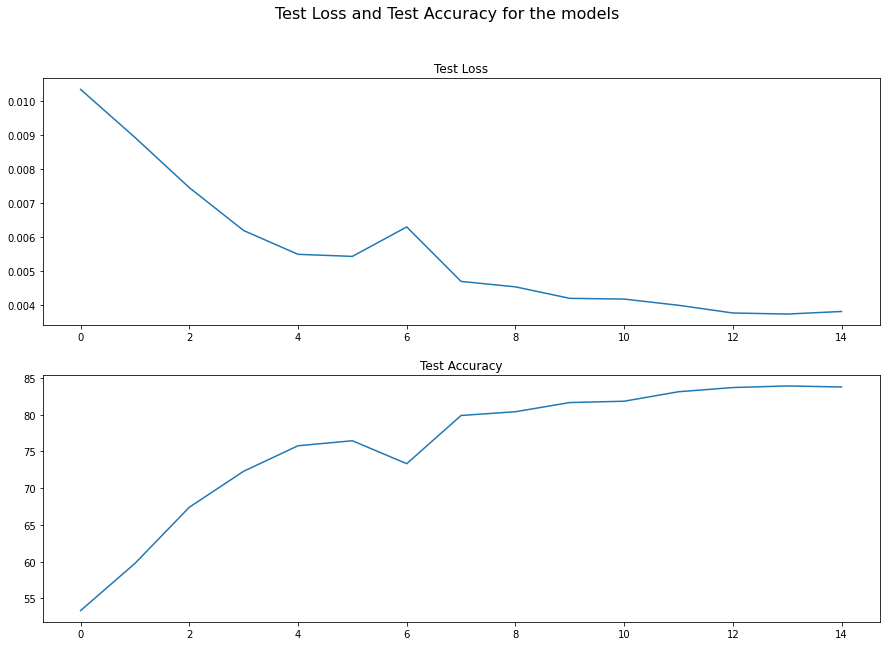

In [8]:
if __name__ == '__main__':
  from tqdm import tqdm
  if hasattr(tqdm, '_instances'):
    tqdm._instances.clear()

  classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog',
    'frog', 'horse', 'ship', 'truck')
  
  main(classes)